In [6]:
import torch

%load_ext autoreload
%autoreload 2

In [12]:
import itertools

corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

vocabulary = set(itertools.chain.from_iterable(corpus))
print(vocabulary)

{'f', 's', 'F', 'i', '.', 'o', 'm', 't', 'k', 'w', 'a', 'l', 'r', 'u', 'b', 'e', 'n', 'T', ' '}


In [13]:
import re

In [18]:
file = open('./pizza_intro.txt', 'r')
text = file.read()
file.close()
text

"Pizza (Italian: [ˈpittsa], Neapolitan: [ˈpittsə]) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven.[1] A small pizza is sometimes called a pizzetta.\n\nIn Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced and eaten with the use of a knife and fork.[2][3] In casual settings it is cut into wedges to be eaten while held in the hand.\n\nThe term pizza was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania.[4] Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries.[5] It has become one of the most popular foods in the world and a common fast food item in Europe and North America, available at pi

In [44]:
text2 = re.sub(r'\[[\w]+\]', '', text)
text2

"Pizza (Italian: , Neapolitan: ) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.\n\nIn Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced and eaten with the use of a knife and fork. In casual settings it is cut into wedges to be eaten while held in the hand.\n\nThe term pizza was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. It has become one of the most popular foods in the world and a common fast food item in Europe and North America, available at pizzerias (restaurants specializing

In [ ]:
matches = re.compile(r'').finditer(text2)

In [7]:
import random
import numpy as np
from StanfordDataset.treebank import StanfordSentiment
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import time

from word2vec import *
from sgd import *

# Check Python Version
import sys
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)

startTime=time.time()
wordVectors = np.concatenate(
    ((np.random.rand(nWords, dimVectors) - 0.5) /
       dimVectors, np.zeros((nWords, dimVectors))),
    axis=0)

In [15]:
dataset.__dict__.keys()

dict_keys(['path', 'tablesize', '_sentences', '_sentlengths', '_cumsentlen', '_tokens', '_tokenfreq', '_wordcount', '_revtokens'])

<IPython.core.display.Javascript object>


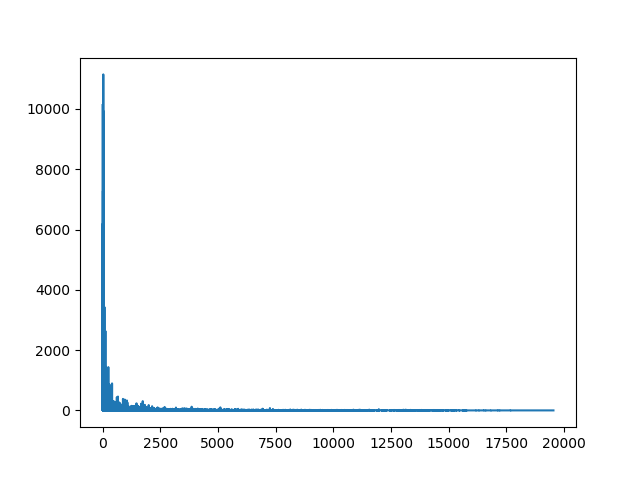

In [18]:
fig, ax = plt.subplots()
ax.plot(list(dataset._tokenfreq.values()))

In [ ]:
wordVectors = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C,
        negSamplingLossAndGradient),
    wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)
# Note that normalization is not called here. This is not a bug,
# normalizing during training loses the notion of length.

print("sanity check: cost at convergence should be around or below 10")
print("training took %d seconds" % (time.time() - startTime))

# concatenate the input and output word vectors
wordVectors = np.concatenate(
    (wordVectors[:nWords,:], wordVectors[nWords:,:]),
    axis=0)

visualizeWords = [
    "great", "cool", "brilliant", "wonderful", "well", "amazing",
    "worth", "sweet", "enjoyable", "boring", "bad", "dumb",
    "annoying", "female", "male", "queen", "king", "man", "woman", "rain", "snow",
    "hail", "coffee", "tea"]

visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2])

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i],
        bbox=dict(facecolor='green', alpha=0.1))

plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))

plt.savefig('word_vectors.png')